In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
from scipy.stats import iqr,skew, kurtosis
from scipy.stats import shapiro

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
# Dataframe statistical description
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


# Train and Test split

In [5]:
#Extracting the values of independent and dependent variables as array.
X=np.array(df['R&D Spend']).reshape(1,-1)
y=np.array(df['Profit']).reshape(1,-1)
print(X.shape, y.shape)

(1, 50) (1, 50)


In [6]:
#Reshaping the array
X=np.array(df['R&D Spend']).reshape(-1,1)
y=df['Profit']
print(X.shape, y.shape)

(50, 1) (50,)


In [7]:
#Splitting the Train and the test data in proportion of 70 and 30.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=23)

In [10]:
# Create linear regression object
lr = linear_model.LinearRegression()

# Train the model using the training sets
l_reg=lr.fit(X_train,y_train)


Coefficients: 
 [0.85851788]
Intercept: 
 48563.3
Mean squared error: 68624402.17
Root mean squared error: 8283.98
Coefficient of determination: 0.91


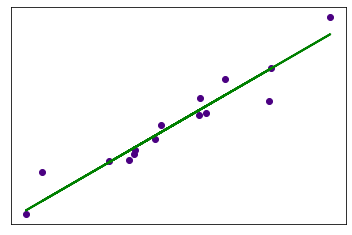

In [17]:

# Predicted value of profit (y) using test set
y_pred = l_reg.predict(X_test)

# The coefficient
print('Coefficients: \n', l_reg.coef_)

#The intercept
print('Intercept: \n',round(l_reg.intercept_,2))

# Mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# Root mean squared error
print('Root mean squared error: %.2f'
      % sqrt(mean_squared_error(y_test, y_pred)))



# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))



# Plot outputs
plt.scatter(X_test, y_test,  color='indigo')
plt.plot(X_test, y_pred, color='green', linewidth=2)

plt.xticks(())
plt.yticks(())

plt.show()

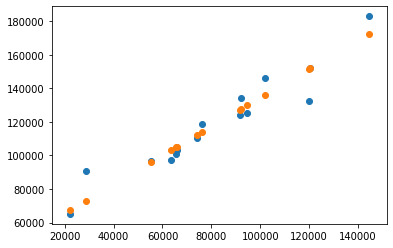

In [204]:
#Scatter plot of predicted and recorded values of profit
plt.scatter(X_test,y_test)
plt.scatter(X_test,y_pred)

# Assumption validation

### 1. Continuous variable -Valid

### 2. Linearity: Valid
The scatter plot below shows the linear relationship between the outcome variable and predictor.

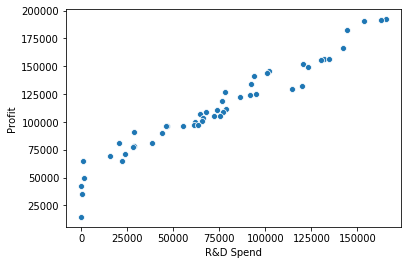

In [12]:
sns.scatterplot(x='R&D Spend', y='Profit', data=df)
#sns.scatterplot(x='Administration', y='Profit', data=df)
#sns.scatterplot(x='Marketing Spend', y='Profit', data=df)

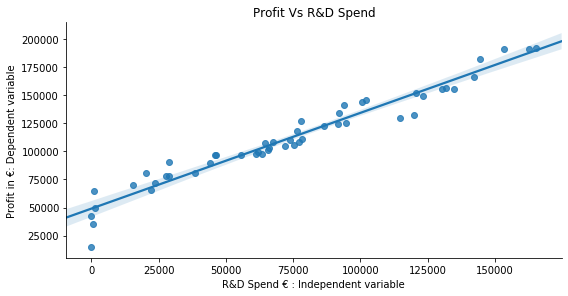

In [49]:
#scatter plot between R&D Spend and profit with fitted line
sns.lmplot(x='R&D Spend',y='Profit',data=df,aspect=2,height=4)
plt.xlabel('R&D Spend € : Independent variable')
plt.ylabel('Profit in €: Dependent variable')
plt.title('Profit Vs R&D Spend');

In [16]:
#Correlation matrix
df.corr(method='pearson')

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


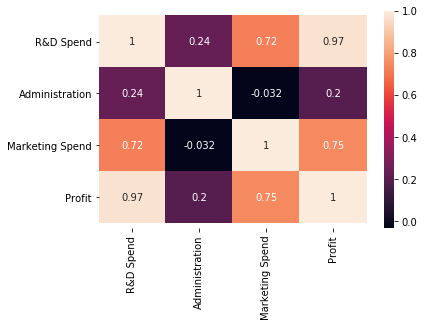

In [21]:
#Correlation matrix
corrMat=df.corr()
x=sns.heatmap(corrMat, annot=True)
b,t=plt.ylim()
b+=0.6
t-=0.6
plt.ylim(b,t)
plt.show()

### 3. Absence of noise or outliers: The box plots below do not show any sign of significant outliers.

In [149]:
#Checking for missing value
df.isnull().sum()


R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Results shows there is no missing values, which is rare but great for this exercise.

Text(0.5, 1.0, 'Box plot of Profit vs State')

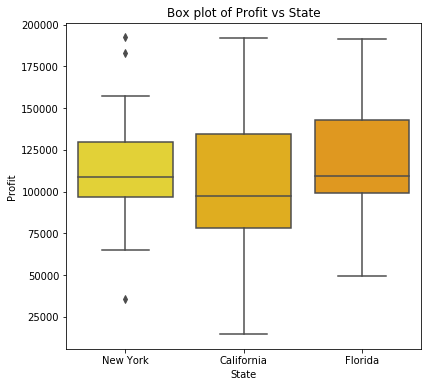

In [206]:
#Box plot of profit based on State
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.boxplot(x='State', y='Profit',data=df,palette='Wistia',ax=ax)
ax.set_title('Box plot of Profit vs State')


The above boxplot shows the average profit for New York and Florida is same 113756.5 and 118774 repectively. Average for California is less comparatively 103905 but range is more.

In [167]:
#Mean, min and max of profit based on State
df.groupby('State').agg(['mean','min','max'])['Profit']

,mean,min,max
State,,,
California,103905.175294,14681.40,191792.06
Florida,118774.024375,49490.75,191050.39
New York,113756.446471,35673.41,192261.83


In [29]:
#The outliers shown in the boxplot
df.loc[((df['Profit']> 175000)|(df['Profit']< 50000)) & (df['State']=='New York')]
#These values can be deleted and see if the model prediction improves.

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
3,144372.41,118671.85,383199.62,New York,182901.99
48,542.05,51743.15,0.00,New York,35673.41


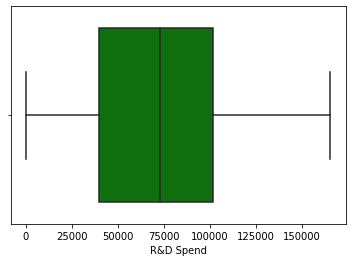

In [61]:
#Box plot of predictor "R&D Spend"
sns.boxplot(df['R&D Spend'],color='green')

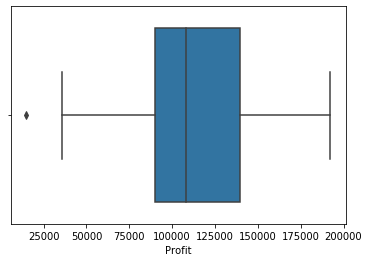

In [30]:
#Boxplot of outcome variable "Profit"
sns.boxplot(df['Profit'])

### 4. Gaussian distribution: The predictors and outcome variables should be normally distributed

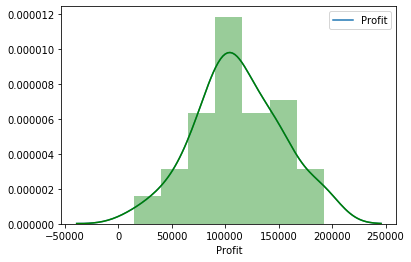

In [35]:

sns.kdeplot(df['Profit'])
sns.distplot(df['Profit'],color="g")

''

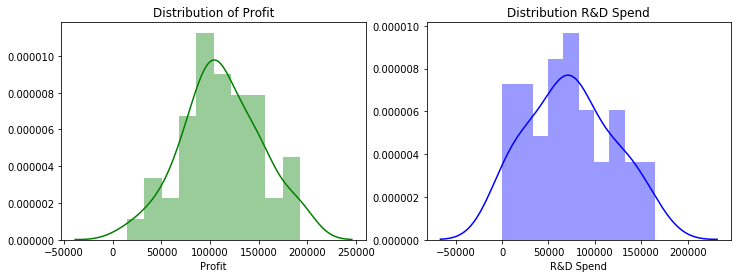

In [64]:
#Plotting histogram 
f= plt.figure(figsize=(12,4))
#Histogram of outcome variable -Profit
ax=f.add_subplot(121)
sns.distplot(df['Profit'],bins=10,color='g',ax=ax)
ax.set_title('Distribution of Profit')
#Histogram of predictor -R&D Spend
ax=f.add_subplot(122)
sns.distplot((df['R&D Spend']),bins=10,color='b',ax=ax)
ax.set_title('Distribution R&D Spend')
;



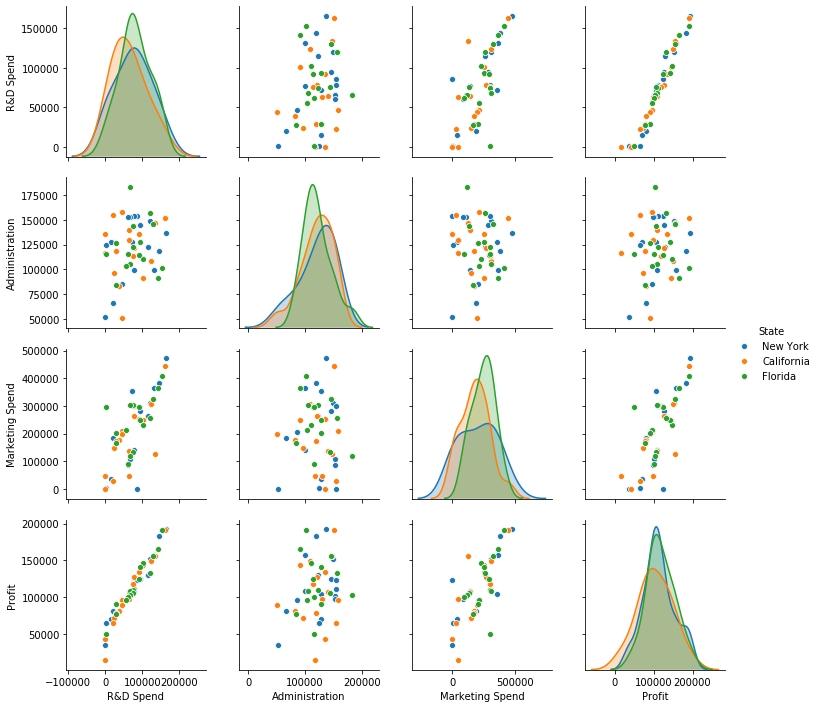

In [33]:
#Pairplot between all predictors and outcome variable
sns.pairplot(df, hue='State')

In [214]:
#Measure of Dispersion
#Skewness
print("skewness of Profit:",round(skew(df['Profit']),2))
print("skewness of R&D Spend:",round(skew(df['R&D Spend']),2))
# The skewness coefficient is close to 0, which means that the distribution is Normal
#Kurtosis
print("Kurtosis of Profit:",round(kurtosis(df['Profit']),2))
print("Kurtosis of R&D Spend:",round(kurtosis(df['R&D Spend']),2))

skewness of Profit: 0.02
skewness of R&D Spend: 0.16
Kurtosis of Profit: -0.18
Kurtosis of R&D Spend: -0.81


In [230]:
#Test for Normality
print('shapiro–wilk test for Proft',shapiro(df['Profit']))
# ShapiroResult(statistic=0.9848830103874207, pvalue=0.766564130783081)


print('shapiro–wilk test for R&D Spend',shapiro(df['R&D Spend']))
# ShapiroResult(statistic=0.9673413634300232, , pvalue=0.18005183339118958)

shapiro–wilk test for Proft (0.9848830103874207, 0.766564130783081)
shapiro–wilk test for R&D Spend (0.9673413634300232, 0.18005183339118958)


### 5.Homoscedasticity: The residue variance is the same for all values of predictor

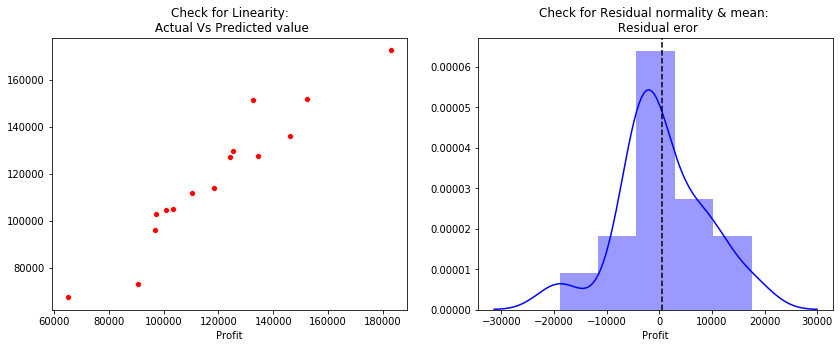

In [184]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test,y_pred,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred),ax=ax,color='b')
ax.axvline((y_test - y_pred).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror');

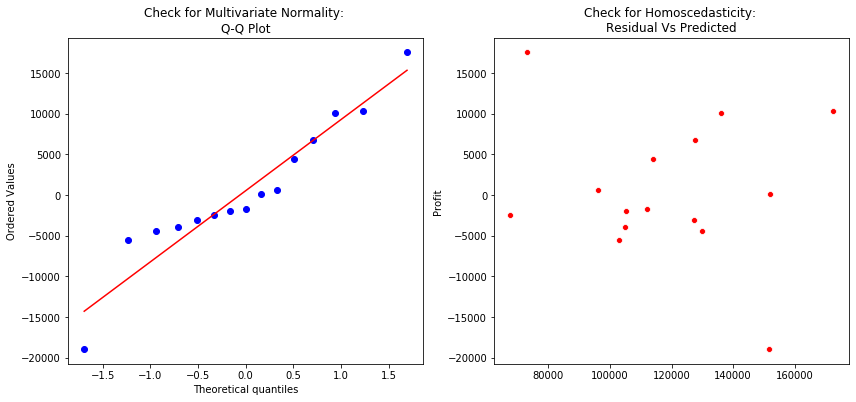

In [185]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred), x= y_pred, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');